# Bayesian exploration using script

In [1]:
# main function
import numpy as np
import torch
import matplotlib.pyplot as plt

from xopt.bayesian.algorithms import bayesian_exploration

# test function
from xopt.evaluators import test_TNK
?bayesian_exploration

Signature:
bayesian_exploration(
    vocs,
    evaluate_f,
    n_steps=1,
    n_initial_samples=1,
    output_path=None,
    custom_model=None,
    executor=None,
    restart_file=None,
    initial_x=None,
    verbose=True,
    use_gpu=False,
    generator_options=None,
)
Docstring:
Bayesian Exploration

Parameters
----------
vocs : dict
    Varabiles, objectives, constraints and statics dictionary, see xopt documentation for detials

evaluate_f : callable
    Returns dict of outputs after problem has been evaluated

n_steps : int, default = 1
    Number of optimization steps to execute

n_initial_samples : int, defualt = 1
    Number of initial samples to take before using the model, overwritten by initial_x

output_path : str, default = ''
    Path location to place outputs

custom_model : callable, optional
    Function of the form f(train_inputs, train_outputs) that returns a trained custom model

executor : Executor, optional
    Executor object to run evaluate_f

restart_file : s

In [2]:
# Get VOCS
VOCS = test_TNK.VOCS

# technically this is not necessary, but its good to be explict
VOCS['objectives'] = {'y1' : None}

# Get evaluate function
EVALUATE = test_TNK.evaluate_TNK


# Run - see comments for example options
results = bayesian_exploration(VOCS, EVALUATE,
                               n_initial_samples=5,                   ## Specify number of initial random samples
                               initial_x=None,                        ## Specify explicit initial sample locations (overwrites n_initial_samples)
                               n_steps=30,                            ## number of optimization step
                               verbose=True)

Candidate(s): tensor([[1.0365, 0.2963]], dtype=torch.float64)
Candidate(s): tensor([[0., 0.]], dtype=torch.float64)
Candidate(s): tensor([[1.7100, 0.0000]], dtype=torch.float64)
Candidate(s): tensor([[0.7855, 0.9808]], dtype=torch.float64)
Candidate(s): tensor([[0.0000, 1.4603]], dtype=torch.float64)
Candidate(s): tensor([[1.1161, 0.7383]], dtype=torch.float64)
Candidate(s): tensor([[0.4492, 1.0619]], dtype=torch.float64)
Candidate(s): tensor([[0.8147, 0.6836]], dtype=torch.float64)
Candidate(s): tensor([[1.0591, 0.1827]], dtype=torch.float64)
Candidate(s): tensor([[0.9981, 0.0681]], dtype=torch.float64)
Candidate(s): tensor([[0.8662, 1.0609]], dtype=torch.float64)
Candidate(s): tensor([[0.3517, 1.1503]], dtype=torch.float64)
Candidate(s): tensor([[1.1668, 0.6314]], dtype=torch.float64)
Candidate(s): tensor([[0.1553, 1.0590]], dtype=torch.float64)
Candidate(s): tensor([[0.0370, 0.9960]], dtype=torch.float64)
Candidate(s): tensor([[0.6236, 1.1654]], dtype=torch.float64)
Candidate(s): te

dict_keys(['variables', 'objectives', 'constraints', 'constraint_status', 'feasibility', 'model'])


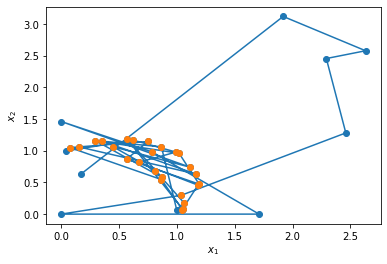

In [3]:
# plot exploration results and path - exploration should explore the feasible region of the TNK problem - See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf
fig, ax = plt.subplots()
print(results.keys())
variables = results['variables']
valid = results['variables'][results['feasibility'].flatten()]
ax.plot(variables[:, 0], variables[:, 1], '-o')
ax.plot(valid[:, 0], valid[:, 1], 'o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

plt.show()

### Bayesian exploration with proximal biasing
- should result in a smoother path through input space

In [7]:
# Get VOCS
VOCS = test_TNK.VOCS

# technically this is not necessary, but its good to be explict
VOCS['objectives'] = {'y1' : None}
# Get evaluate function
EVALUATE = test_TNK.evaluate_TNK

generator_options = {'sigma': torch.eye(2) * 0.5,            ## Specify proximal term (requires batch_size = 1)
                     #'batch_size': 5,                       ## Specify batched exploration
                     # 'custom_model': myCustomModel,        ## Specify custom model creation function
                    }

# Run - see comments for example options
results = bayesian_exploration(VOCS, EVALUATE,
                               generator_options = generator_options,
                               n_initial_samples=5,                   ## Specify number of initial random samples
                               initial_x=None,                        ## Specify explicit initial sample locations (overwrites n_initial_samples)
                               use_gpu=False,                         ## Use GPU (if available)
                               n_steps=30,                            ## number of optimization step
                               # restart_data_file = 'results.json',  ## restart optimization file
                               verbose=True)

Candidate(s): tensor([[1.3002, 0.6666]], dtype=torch.float64)
Candidate(s): tensor([[0.8639, 0.3112]], dtype=torch.float64)
Candidate(s): tensor([[0.1833, 0.0738]], dtype=torch.float64)
Candidate(s): tensor([[0.5284, 0.9776]], dtype=torch.float64)
Candidate(s): tensor([[0.3327, 1.0595]], dtype=torch.float64)
Candidate(s): tensor([[0.1838, 1.0790]], dtype=torch.float64)
Candidate(s): tensor([[0.0753, 1.0230]], dtype=torch.float64)
Candidate(s): tensor([[0.4375, 1.1543]], dtype=torch.float64)
Candidate(s): tensor([[0.9568, 0.9808]], dtype=torch.float64)
Candidate(s): tensor([[1.1157, 0.3054]], dtype=torch.float64)
Candidate(s): tensor([[1.0658, 0.1537]], dtype=torch.float64)
Candidate(s): tensor([[1.0340, 0.0720]], dtype=torch.float64)
Candidate(s): tensor([[0.9894, 0.5070]], dtype=torch.float64)
Candidate(s): tensor([[1.0949, 0.8384]], dtype=torch.float64)
Candidate(s): tensor([[0.7811, 0.7543]], dtype=torch.float64)
Candidate(s): tensor([[0.7611, 1.1305]], dtype=torch.float64)
Candidat

dict_keys(['variables', 'objectives', 'constraints', 'constraint_status', 'feasibility', 'model'])


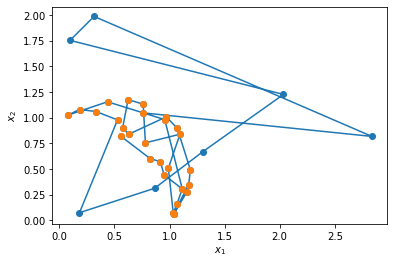

In [8]:
# plot exploration results and path - exploration should explore the feasible region of the TNK problem - See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf
fig, ax = plt.subplots()
print(results.keys())
variables = results['variables']
valid = results['variables'][results['feasibility'].flatten()]
ax.plot(variables[:, 0], variables[:, 1], '-o')
ax.plot(valid[:, 0], valid[:, 1], 'o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

plt.show()